# Fairness in Social Influence Maximization via Optimal Transport  
### Authors: Guillaume MARIN-BERTIN & Jaishan BURTON ELMO  

**Table of Contents**  
- 1. [Introduction](#introduction)  
- 2. [Mutual Fairness: A New Metric](#mutual-fairness)  
- 3. [Fairness Evaluation](#fairness-evaluation)  
- 4. [Balancing Fairness and Efficiency](#fairness-vs-efficiency)  
- 5. [Improving Fairness with S3D](#s3d-algorithm)
- 6. [Conclusion](#conclusion)  
- [Appendix](#appendix)  
- [References](#references)  

This is a blog post about the article “Fairness in Social Influence Maximization via Optimal Transport” published by Shubham Chowdhary et al. in 2024 and available [**here**](https://neurips.cc/virtual/2024/poster/94521).

### [1. Introduction](#introduction)  
In today’s digital society, social networks play a major role in how information spreads. Whether it is a public health campaign, a political message, or viral marketing, the ability to maximize influence is crucial. Companies, governments, and organizations leverage Influence Maximization (IM) algorithms to strategically select key individuals—called seeds—who will initiate a diffusion process, ensuring that information reaches the largest possible audience.  

Imagine a scenario where a job-matching platform uses an Influence Maximization (IM) strategy to promote career opportunities to young professionals. The goal is to spread job postings efficiently across different professional communities. However, due to the structure of the social network, the algorithm selects key individuals (seeds) in such a way that:

- In 50% of cases, all the job opportunities are shared within a network of university graduates, while vocational school graduates receive none.
- In the other 50% of cases, the opposite happens.  

At first glance, this might seem fair: both groups have an equal expected chance of seeing the job offers. However, in practice, one group is always entirely excluded in each scenario, creating a systemic disadvantage for those who miss out on critical career opportunities.

To fix this, researchers have tried adding fairness constraints to IM algorithms. The main ideas include:  

- **Equity-based fairness** (Stoica et al., 2020): Ensures that each group has the same expected proportion of influenced users.  
- **Max-min fairness** (Fish et al., 2019; Zhu et al., 2019): Maximizes the minimum probability that any group receives information.  
- **Diversity-aware methods** (Tsang et al., 2019): Ensure that no single group dominates the influence process.  

Despite these efforts, a fundamental issue remains: existing metrics treat groups independently and do not capture the joint probability of outreach. This means they can create the illusion of fairness while still allowing systematic exclusion of certain communities.

To address this, we propose a new fairness-aware framework that better distributes influence across communities:

1. **Mutual Fairness**: A better way to measure fairness, inspired by Optimal Transport. Instead of just looking at how much information each group gets in total, it ensures they receive the message at the same time.  
2. **S3D Algorithm**: A smarter way to choose influencers, balancing fairness and efficiency. It adjusts seed selection dynamically to improve fairness while still reaching as many people as possible.  

### [2. Mutual Fairness: A New Metric](#mutual-fairness)


### [3. Fairness Evaluation](#fairness-evaluation) 


### [4. Balancing Fairness and Efficiency](#fairness-vs-efficiency)


### [5. Improving Fairness with S3D](#s3d-algorithm)

#### Stochastic Seed Selection Descent (S3D)

While Mutual Fairness provides a way to measure fairness, Influence Maximization (IM) algorithms still need a method to optimize it without sacrificing outreach. S3D addresses this by dynamically adjusting seed selection to ensure a balanced information spread across all communities.

Instead of selecting influential nodes solely based on popularity, S3D explores alternative seed sets, optimizing both fairness and outreach through an iterative process:

The algorithm follows these key steps:

1. **Initial Seed Selection**:  
   Influential nodes are chosen using traditional heuristics (e.g., degree centrality, community detection).

2. **Exploration of Neighboring States**:  
   The algorithm tests alternative seed sets by adding, swapping, or removing nodes.   

3. **Fairness Evaluation**:  
   Each set is scored using the β-Fairness metric, which balances fairness and efficiency.

4. **Acceptance Criteria (Metropolis-Hastings Selection Rule)**:  
   The new seed set \(S'\) is accepted with a probability defined as:
$$
p_{\text{accept}} \leftarrow \min \left\{ 1, e^{E_S - E_{S'}} \right\}
$$

   ensuring fairness-improving modifications are favored while maintaining some randomness.

5. **Convergence**:  
   The process runs until the fairness score stabilizes, achieving an optimal trade-off between fairness and outreach.

#### Experimental Validation of S3D

To evaluate the effectiveness of S3D, we compare it against traditional influence maximization algorithms on real-world social networks.  

Dataset : Here we can take for example job-matching networks where nodes represent individuals looking for job opportunities and edges represent connections between people (e.g., same school, same company, LinkedIn network).

- Traditional IM methods (bas_d, bas_g) → Select highly connected influencers, ignoring fairness.
- Fairness-aware heuristics (hrt_d, hrt_g) → Older fairness-based methods with static rules.
- S3D (our approach) → Dynamically selects seeds to balance fairness and efficiency.

1. Fairness (Mutual Fairness Score) – Measures how equally information is distributed across different groups.
2. Efficiency (Total Outreach) – Measures how many people receive job opportunities in total.  

#### Does S3D Improve Fairness?  

Imagine a job-matching platform that aims to spread job opportunities equally across university graduates and vocational school graduates.

- Traditional IM methods pick influencers mostly from highly connected elite universities, leaving out vocational school graduates.
- S3D Solution: By dynamically adjusting seed selection, S3D ensures that both communities receive job postings more equitably.

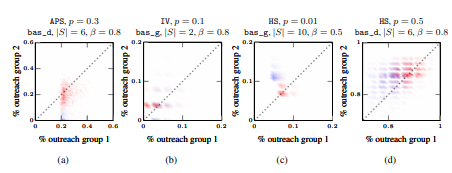

- S3D (red points) significantly improves fairness compared to label-blind methods (blue).
- The outreach distribution shifts towards the diagonal, meaning both groups receive information more equally.
Without S3D, certain communities miss job postings entirely in some scenarios.

#### How Does S3D Balance Fairness and Efficiency?  

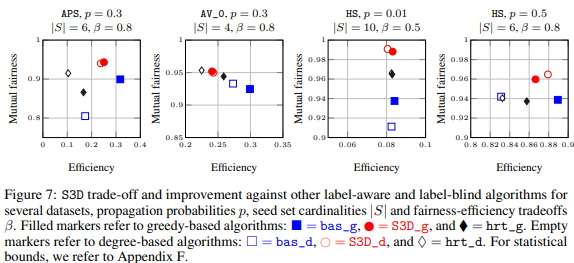

- S3D achieves the highest fairness scores (y-axis).  
- Minimal efficiency loss (x-axis) → Proves that fairness gains do not come at a high cost.
- Insight: S3D is most useful in moderately connected networks (e.g., workplaces, schools).

#### Impact of S3D 

S3D improves information dissemination by ensuring a more equitable distribution between different groups, without sacrificing efficiency. In our job-matching example, it allows graduates of professional schools to access the same opportunities as those from prestigious universities, thus leading to inequalities linked to the social network. Thanks to its adaptive approach, S3D stands out as an effective solution to correct the biases of traditional algorithms while maintaining a broad reach. 

### [6. Conclusion](#conclusion)

